In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2023-07-28 07:11:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘OnlineNewsPopularity.zip’

OnlineNewsPopularit     [        <=>         ]   7.13M   282KB/s    in 28s     

2023-07-28 07:11:55 (262 KB/s) - ‘OnlineNewsPopularity.zip’ saved [7476401]



In [4]:
ls

OnlineNewsPopularity.names  news-exploration.ipynb
OnlineNewsPopularity.zip    news.csv
demo.csv                    test.csv
news-download.ipynb         train.csv


In [5]:
! unzip OnlineNewsPopularity.zip
!ls 

Archive:  OnlineNewsPopularity.zip
   creating: OnlineNewsPopularity/
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.names  
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.csv  
OnlineNewsPopularity       news-exploration.ipynb
OnlineNewsPopularity.names news.csv
OnlineNewsPopularity.zip   test.csv
demo.csv                   train.csv
news-download.ipynb


In [6]:
!ls OnlineNewsPopularity

OnlineNewsPopularity.csv   OnlineNewsPopularity.names


In [7]:
! rm OnlineNewsPopularity.zip
! ls

OnlineNewsPopularity       news-exploration.ipynb
OnlineNewsPopularity.names news.csv
demo.csv                   test.csv
news-download.ipynb        train.csv


In [8]:
! mv OnlineNewsPopularity/* .
! rm -rf OnlineNewsPopularity

In [9]:
with open("OnlineNewsPopularity.names", "r") as f:
    names = f.read().strip().split('\n')

In [10]:
col_names = names[41:111]
col_names

['     0. url:                           URL of the article',
 '     1. timedelta:                     Days between the article publication and',
 '                                       the dataset acquisition',
 '     2. n_tokens_title:                Number of words in the title',
 '     3. n_tokens_content:              Number of words in the content',
 '     4. n_unique_tokens:               Rate of unique words in the content',
 '     5. n_non_stop_words:              Rate of non-stop words in the content',
 '     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the',
 '                                       content',
 '     7. num_hrefs:                     Number of links',
 '     8. num_self_hrefs:                Number of links to other articles',
 '                                       published by Mashable',
 '     9. num_imgs:                      Number of images',
 '    10. num_videos:                    Number of videos',
 '    11. average_token_lengt

In [11]:
def isnum(x):
    try:
        x = int(x.strip('.'))
        return True
    except:
        return False

In [12]:
news_columns = [i.lstrip().split(":")[0].split(" ") for i in col_names]
news_columns = [i[1] for i in news_columns if len(i) > 1 and isnum(i[0])]
news_columns

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

In [13]:
len(news_columns)

61

In [14]:
news_train = pd.read_csv("OnlineNewsPopularity.csv")
print(news_train.shape)
news_train.head()

(39644, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [15]:
news_train.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [16]:
news_train.columns = [i.strip() for i in news_train.columns]
news_train.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [17]:
columns_to_drop = ["url", "timedelta"]
news_train = news_train.drop(columns=columns_to_drop)
print(news_train.shape)
news_train.head()

(39644, 59)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [18]:
# popular=0, unpopular=1
D=1400
news_train["shares_binary"] = news_train["shares"].apply(lambda x: 0 if x >= D else 1 )

In [19]:
news_train

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_binary
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,0
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,0
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,1


In [20]:
news_train["shares_binary"].value_counts()

0    21154
1    18490
Name: shares_binary, dtype: int64

<Axes: >

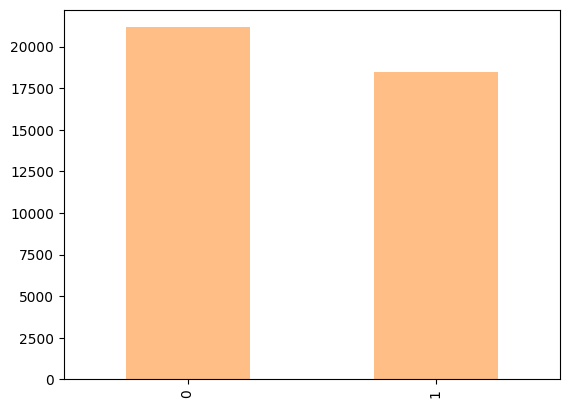

In [21]:
news_train["shares_binary"].value_counts().plot(kind="bar", color="C1", alpha=0.5)

In [22]:
news_train.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

<Axes: >

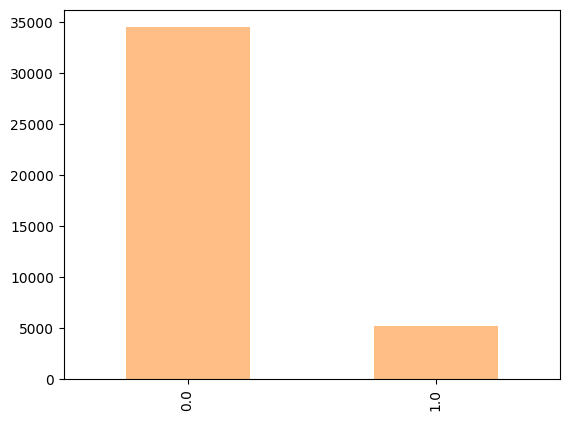

In [23]:
news_train["is_weekend"].value_counts().plot(kind="bar", color="C1", alpha=0.5)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
news_train, news_test = train_test_split(news_train, test_size=8000, random_state=1000)
news_train.reset_index(inplace=True, drop=True)
news_test.reset_index(inplace=True, drop=True)
print(news_train.shape, news_test.shape)

(31644, 60) (8000, 60)


<Axes: >

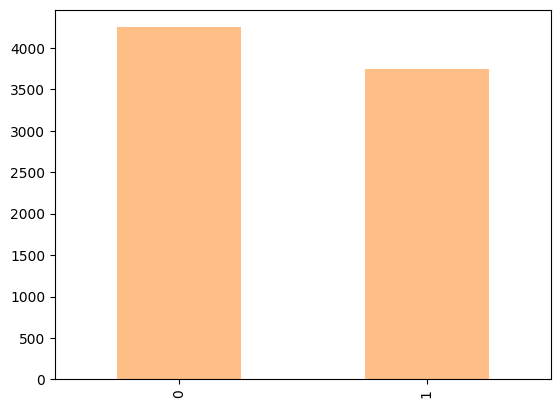

In [26]:
news_test["shares_binary"].value_counts().plot(kind="bar", color="C1", alpha=0.5)

In [27]:
news_train.to_csv("train.csv", index=None)
news_test.to_csv("test.csv", index=None)

In [28]:
news_all = pd.concat([news_train, news_test])
news_all.to_csv("news.csv", index=None)

In [29]:
news_demo = news_train.sample(100, random_state=1000)
news_demo.reset_index(inplace=True, drop=True)
news_demo.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_binary
0,11.0,891.0,0.427252,1.0,0.624490,10.0,7.0,1.0,0.0,4.683502,...,0.8,-0.253889,-0.80,-0.025,0.0,0.0,0.5,0.0,1300,1
1,8.0,585.0,0.473230,1.0,0.671687,9.0,3.0,1.0,1.0,4.382906,...,1.0,-0.225000,-0.70,-0.125,0.1,0.1,0.4,0.1,1400,0
2,9.0,1497.0,0.480116,1.0,0.607319,8.0,4.0,51.0,1.0,4.645959,...,1.0,-0.320133,-0.80,-0.050,0.0,0.0,0.5,0.0,684,1
3,9.0,190.0,0.642458,1.0,0.759259,6.0,1.0,1.0,0.0,4.578947,...,0.5,-0.172685,-0.20,-0.100,0.0,0.0,0.5,0.0,1600,0
4,11.0,256.0,0.566406,1.0,0.689873,11.0,6.0,4.0,0.0,4.605469,...,0.8,-0.154444,-0.25,-0.100,0.0,0.0,0.5,0.0,1800,0


In [30]:
news_demo.to_csv("demo.csv", index=None)

In [31]:
cat_cols = ["data_channel_is_lifestyle", 
            "data_channel_is_entertainment", 
            "data_channel_is_bus", 
            "data_channel_is_socmed", 
            "data_channel_is_tech", 
            "data_channel_is_world", 
            "weekday_is_monday", 
            "weekday_is_tuesday", 
            "weekday_is_wednesday", 
            "weekday_is_thursday", 
            "weekday_is_friday", 
            "weekday_is_saturday", 
            "weekday_is_sunday", 
            "is_weekend", 
            "shares_binary"]

print(len(cat_cols))

15


In [32]:
num_cols = ["n_tokens_title", 
            "n_tokens_content", 
            "n_unique_tokens", 
            "n_non_stop_words", 
            "n_non_stop_unique_tokens", 
            "num_hrefs", 
            "num_self_hrefs", 
            "num_imgs", 
            "num_videos", 
            "average_token_length", 
            "num_keywords", 
            "kw_min_min", 
            "kw_max_min", 
            "kw_avg_min", 
            "kw_min_max", 
            "kw_max_max", 
            "kw_avg_max", 
            "kw_min_avg", 
            "kw_max_avg", 
            "kw_avg_avg", 
            "self_reference_min_shares", 
            "self_reference_max_shares", 
            "self_reference_avg_sharess", 
            "LDA_00", 
            "LDA_01", 
            "LDA_02", 
            "LDA_03", 
            "LDA_04", 
            "global_subjectivity", 
            "global_sentiment_polarity", 
            "global_rate_positive_words", 
            "global_rate_negative_words", 
            "rate_positive_words", 
            "rate_negative_words", 
            "avg_positive_polarity", 
            "min_positive_polarity", 
            "max_positive_polarity", 
            "avg_negative_polarity", 
            "min_negative_polarity", 
            "max_negative_polarity", 
            "title_subjectivity", 
            "title_sentiment_polarity", 
            "abs_title_subjectivity", 
            "abs_title_sentiment_polarity", 
            "shares"]
print(len(num_cols))

45


In [33]:
news_all[num_cols+cat_cols]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares_binary
0,7.0,976.0,0.471933,1.0,0.718574,5.0,1.0,1.0,0.0,4.689549,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,10.0,1177.0,0.483556,1.0,0.638122,56.0,3.0,2.0,0.0,4.996602,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,12.0,589.0,0.472509,1.0,0.616246,3.0,3.0,6.0,0.0,4.482173,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,8.0,778.0,0.454663,1.0,0.575697,9.0,5.0,13.0,0.0,4.817481,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,11.0,232.0,0.634783,1.0,0.808824,7.0,5.0,0.0,0.0,4.616379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7.0,1073.0,0.425352,1.0,0.584733,16.0,10.0,1.0,6.0,4.640261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
7996,13.0,695.0,0.453079,1.0,0.576355,23.0,3.0,1.0,0.0,4.729496,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
7997,16.0,244.0,0.621849,1.0,0.758865,5.0,3.0,2.0,0.0,4.799180,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7998,11.0,301.0,0.615646,1.0,0.809524,3.0,1.0,1.0,1.0,4.362126,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [34]:
ls

OnlineNewsPopularity.csv    news-exploration.ipynb
OnlineNewsPopularity.names  news.csv
demo.csv                    test.csv
news-download.ipynb         train.csv


In [35]:
corr = news_all.corr()
corr["shares"]

n_tokens_title                   0.008783
n_tokens_content                 0.002459
n_unique_tokens                  0.000806
n_non_stop_words                 0.000443
n_non_stop_unique_tokens         0.000114
num_hrefs                        0.045404
num_self_hrefs                  -0.001900
num_imgs                         0.039388
num_videos                       0.023936
average_token_length            -0.022007
num_keywords                     0.021818
data_channel_is_lifestyle        0.005831
data_channel_is_entertainment   -0.017006
data_channel_is_bus             -0.012376
data_channel_is_socmed           0.005021
data_channel_is_tech            -0.013253
data_channel_is_world           -0.049497
kw_min_min                      -0.001051
kw_max_min                       0.030114
kw_avg_min                       0.030406
kw_min_max                       0.003901
kw_max_max                       0.007863
kw_avg_max                       0.044686
kw_min_avg                       0

In [36]:
import sys
sys.path.append("../../../")
sys.path.append("../../")
from margctgan.metrics import utility

In [37]:
cat_cols

['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'shares_binary']

In [38]:
news_train["data_channel_is_entertainment"].value_counts()

0.0    25980
1.0     5664
Name: data_channel_is_entertainment, dtype: int64

In [39]:
news_train.loc[:, cat_cols] = news_train.loc[:, cat_cols].astype("object")
news_test.loc[:, cat_cols] = news_test.loc[:, cat_cols].astype("object")

In [40]:
f1_score = utility.efficacy_test(fakedata=news_train.drop(columns=["shares"]), 
                                 realdata=news_test.drop(columns=["shares"]), 
                                 target_name="shares_binary", 
                                 cat_cols=cat_cols,
                                 model_name="logistic", 
                                 task="classification")
print(f1_score)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

0.640495867768595


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import classification_report
report = utility.efficacy_test(fakedata=news_train.drop(columns=["shares"]), 
                                 realdata=news_test.drop(columns=["shares"]), 
                                 target_name="shares_binary", 
                                 cat_cols=cat_cols,
                                 model_name="logistic", 
                                 task="classification", 
                                 scorer=lambda **kwargs: classification_report(**kwargs))
print(report)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66      4249
         1.0       0.62      0.66      0.64      3751

    accuracy                           0.65      8000
   macro avg       0.65      0.65      0.65      8000
weighted avg       0.65      0.65      0.65      8000



/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.metrics import confusion_matrix
confusion = utility.efficacy_test(fakedata=news_train.drop(columns=["shares"]), 
                                 realdata=news_test.drop(columns=["shares"]), 
                                 target_name="shares_binary", 
                                 cat_cols=cat_cols,
                                 model_name="logistic", 
                                 task="classification", 
                                 scorer=lambda **kwargs: confusion_matrix(**kwargs))
print(confusion)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

[[2736 1513]
 [1271 2480]]


In [43]:
r2_score = utility.efficacy_test(fakedata=news_train.drop(columns=["shares_binary"]), 
                                 realdata=news_test.drop(columns=["shares_binary"]), 
                                 fit_data=news_all.drop(columns=["shares_binary"]),
                                 target_name="shares", 
                                 cat_cols=cat_cols,
                                 model_name="linear", 
                                 task="regression")
print(r2_score)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

-0.5998035471206078


In [44]:
import numpy as np
from utils.metrics_utils import normalize_score

In [45]:
normalize_score(r2_score, min_value=-np.inf, max_value=1, goal="maximize")

0.2019361850431801

In [46]:
from sklearn.utils.multiclass import type_of_target

In [47]:
type_of_target(news_test["shares_binary"])

'unknown'

In [48]:
from sdmetrics.single_table import LinearRegression

In [49]:
news_train.loc[:, cat_cols] = news_train.loc[:, cat_cols].astype("int")
news_test.loc[:, cat_cols] = news_test.loc[:, cat_cols].astype("int")
LinearRegression.compute(news_test.drop(columns=["shares_binary"]), 
                         news_train.drop(columns=["shares_binary"]), 
                         target="shares")

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_2566/696656962.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  news_train.loc[:, cat_cols] = news_train.loc[:, cat_cols].astype("int")
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_2566/696656962.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  news_test.loc[:, cat_cols] = news_test.loc[:, cat_cols].astype("int")


-0.5999211252649828

In [50]:
rm -rf OnlineNewsPopularity.csv